In [292]:
#library to be imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter('ignore')

# setting max rows and columns 
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold,TimeSeriesSplit,cross_val_score



# Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

import xgboost as xgb
import lightgbm as lgb
#!pip3 install catboost
import catboost as cat

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer




In [293]:
#read imput
df = pd.read_excel("Input.xlsx")

In [294]:
df.shape

(325248, 34)

In [295]:
df.head()

,Policy No.,Manual Code,Actual Cession No,Reinsurer Name,Subtreaty ID,System No.,Member Name,Gender,DOB,DOC,Policy Start Date,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Calc From,Calc To,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month
0,TR000463,BLC,5714516.0,Gen Re India Branch,Gen Re_Group Term-1,07089,XYZ,F,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,N,0,Can,0.288816,2000000.0,NB,NB,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0
1,TR000463,BLC,5714516.0,Gen Re India Branch,Gen Re_Group Term-1,07089,XYZ,F,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,N,0,Can,0.288816,2000000.0,NB,NB,201905.0,3923982.0,1923982,2019-04-02,2019-06-30,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0
2,TR000463,BLC,5714516.0,Gen Re India Branch,Gen Re_Group Term-1,07089,XYZ,F,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,N,0,Can,0.288816,2000000.0,NB,NB,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0
3,TR000463,BLC,5714545.0,Gen Re India Branch,Gen Re_Group Term-1,07220,XYZ,M,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,N,0,Can,0.211735,2000000.0,NB,NB,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0
4,TR000463,BLC,5714545.0,Gen Re India Branch,Gen Re_Group Term-1,07220,XYZ,M,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,N,0,Can,0.211735,2000000.0,NB,NB,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0


In [296]:
# finding sum of null values in the table
df.isnull().sum()

Policy No.                0
Manual Code               0
Actual Cession No         1
Reinsurer Name            0
Subtreaty ID              1
System No.                1
Member Name               0
Gender                    0
DOB                       0
DOC                       0
Policy Start Date         0
Benefit Group ID          0
Plan Code                 0
Benefit Sum Assured       1
Medical                   0
EMR                       0
Policystatus              0
Rein Ratio                1
Sum Retention             1
Account Code              0
Trans Type                0
Process Interval          1
SAR                       1
RSA                       0
Calc From                 0
Calc To                   0
Premium Rate              0
Sub Premium Rate       1008
Amount                    0
Age at Entry              0
Transaction SA            0
T Retention               0
FCL                       0
Month                  1008
dtype: int64

In [297]:
# replace TR00 with null in policy no
df['Policy No.']=df['Policy No.'].str.replace("TR00","")

In [298]:
# replace Gen Re_Group Term- with null in Subtreaty ID
df['Subtreaty ID']=df['Subtreaty ID'].str.replace("Gen Re_Group Term-","")

In [299]:
# fill all null with 1 in Subtreaty ID
df['Subtreaty ID'] = df['Subtreaty ID'].fillna(1)

In [300]:
df['Manual Code'].value_counts()

BLC     192883
TI       64927
CIP      61887
ADB       2301
VLC       1457
ADE       1247
DT         211
ADM        185
CI         127
ADDD        23
Name: Manual Code, dtype: int64

In [301]:
# In gender column replace F with 0 and M with 1
df['Gender'] = df['Gender'].map({"F":0,"M":1})

In [302]:
# In member name column replace XYZ with 1
df['Member Name'] = df['Member Name'].map({"XYZ":1})

In [303]:
df['Medical'] = df['Medical'].map({"N":0,"MED":1})

In [304]:
df['Account Code'] = df['Account Code'].map({"NB":1})

In [305]:
df['Trans Type'] = df['Trans Type'].map({"NB":1})

In [306]:
df['Trans Type'].value_counts()

1    325248
Name: Trans Type, dtype: int64

In [307]:
df.head()

,Policy No.,Manual Code,Actual Cession No,Reinsurer Name,Subtreaty ID,System No.,Member Name,Gender,DOB,DOC,Policy Start Date,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Calc From,Calc To,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month
0,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0
1,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,3923982.0,1923982,2019-04-02,2019-06-30,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0
2,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0
3,0463,BLC,5714545.0,Gen Re India Branch,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0
4,0463,BLC,5714545.0,Gen Re India Branch,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0


## Handling NAN Values

In [308]:
df.isnull().sum()

Policy No.                0
Manual Code               0
Actual Cession No         1
Reinsurer Name            0
Subtreaty ID              0
System No.                1
Member Name               0
Gender                    0
DOB                       0
DOC                       0
Policy Start Date         0
Benefit Group ID          0
Plan Code                 0
Benefit Sum Assured       1
Medical                   0
EMR                       0
Policystatus              0
Rein Ratio                1
Sum Retention             1
Account Code              0
Trans Type                0
Process Interval          1
SAR                       1
RSA                       0
Calc From                 0
Calc To                   0
Premium Rate              0
Sub Premium Rate       1008
Amount                    0
Age at Entry              0
Transaction SA            0
T Retention               0
FCL                       0
Month                  1008
dtype: int64

In [309]:
# in ACTUAL CESSION NO fill na with mean 
df['Actual Cession No'].fillna(df['Actual Cession No'].mean(),inplace=True)

##### System No.

In [310]:
df['Benefit Sum Assured'].fillna(df['Benefit Sum Assured'].median(),inplace=True)

In [311]:
df['Rein Ratio'].fillna(0.200000,inplace=True)

In [312]:
df['Sum Retention'].fillna(2000000.0,inplace=True)

In [313]:
df['Process Interval'].fillna(201905.0,inplace=True)

In [314]:
df['SAR'].fillna(df['SAR'].median(),inplace=True)

In [315]:
df['Sub Premium Rate']=df['Sub Premium Rate'].ffill(axis=0)

In [316]:
df['Month'].fillna(df['Month'].mode(),inplace=True)

In [317]:
df['Trans Type'].value_counts()

1    325248
Name: Trans Type, dtype: int64

In [318]:
df.columns

Index(['Policy No.', 'Manual Code', 'Actual Cession No', 'Reinsurer Name',
       'Subtreaty ID', 'System No.', 'Member Name', 'Gender', 'DOB', 'DOC',
       'Policy Start Date', 'Benefit Group ID', 'Plan Code',
       'Benefit Sum Assured', 'Medical', 'EMR', 'Policystatus', 'Rein Ratio',
       'Sum Retention', 'Account Code', 'Trans Type', 'Process Interval',
       'SAR', 'RSA', 'Calc From', 'Calc To', 'Premium Rate',
       'Sub Premium Rate', 'Amount', 'Age at Entry', 'Transaction SA',
       'T Retention', 'FCL', 'Month'],
      dtype='object')

### Label Encoding

In [319]:
df.head()

,Policy No.,Manual Code,Actual Cession No,Reinsurer Name,Subtreaty ID,System No.,Member Name,Gender,DOB,DOC,Policy Start Date,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Calc From,Calc To,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month
0,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0
1,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,3923982.0,1923982,2019-04-02,2019-06-30,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0
2,0463,BLC,5714516.0,Gen Re India Branch,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,BDB,TBLC,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0
3,0463,BLC,5714545.0,Gen Re India Branch,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0
4,0463,BLC,5714545.0,Gen Re India Branch,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,BDB,TBLC,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0


In [320]:
df.isnull().sum()

Policy No.             0
Manual Code            0
Actual Cession No      0
Reinsurer Name         0
Subtreaty ID           0
System No.             1
Member Name            0
Gender                 0
DOB                    0
DOC                    0
Policy Start Date      0
Benefit Group ID       0
Plan Code              0
Benefit Sum Assured    0
Medical                0
EMR                    0
Policystatus           0
Rein Ratio             0
Sum Retention          0
Account Code           0
Trans Type             0
Process Interval       0
SAR                    0
RSA                    0
Calc From              0
Calc To                0
Premium Rate           0
Sub Premium Rate       0
Amount                 0
Age at Entry           0
Transaction SA         0
T Retention            0
FCL                    0
Month                  0
dtype: int64

In [321]:
df=df.dropna()

In [322]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Manual Code']=le.fit_transform(df['Manual Code'])

In [323]:
le = LabelEncoder()
df['Reinsurer Name']=le.fit_transform(df['Reinsurer Name'])

In [324]:
le = LabelEncoder()
df['Plan Code']=le.fit_transform(df['Plan Code'])

In [325]:
le = LabelEncoder()
df['Benefit Group ID']=le.fit_transform(df['Benefit Group ID'])

In [326]:
df.head()

,Policy No.,Manual Code,Actual Cession No,Reinsurer Name,Subtreaty ID,System No.,Member Name,Gender,DOB,DOC,Policy Start Date,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Calc From,Calc To,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month
0,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0
1,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,3923982.0,1923982,2019-04-02,2019-06-30,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0
2,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0
3,0463,4,5714545.0,0,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,4,8,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0
4,0463,4,5714545.0,0,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,4,8,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325247 entries, 0 to 325246
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Policy No.           325247 non-null  object        
 1   Manual Code          325247 non-null  int64         
 2   Actual Cession No    325247 non-null  float64       
 3   Reinsurer Name       325247 non-null  int64         
 4   Subtreaty ID         325247 non-null  object        
 5   System No.           325247 non-null  object        
 6   Member Name          325247 non-null  int64         
 7   Gender               325247 non-null  int64         
 8   DOB                  325247 non-null  datetime64[ns]
 9   DOC                  325247 non-null  datetime64[ns]
 10  Policy Start Date    325247 non-null  datetime64[ns]
 11  Benefit Group ID     325247 non-null  int64         
 12  Plan Code            325247 non-null  int64         
 13  Benefit Sum As

In [328]:
# taget value is Policy Status. It will be the value to be Predicted
target="Policystatus"

In [329]:
df.head()

,Policy No.,Manual Code,Actual Cession No,Reinsurer Name,Subtreaty ID,System No.,Member Name,Gender,DOB,DOC,Policy Start Date,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Calc From,Calc To,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month
0,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0
1,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,3923982.0,1923982,2019-04-02,2019-06-30,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0
2,0463,4,5714516.0,0,1,07089,1,0,1989-12-03,2018-07-01,2018-07-01,4,8,2812212.0,0,0,Can,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,2019-04-02,2019-06-30,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0
3,0463,4,5714545.0,0,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,4,8,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0
4,0463,4,5714545.0,0,1,07220,1,1,1982-06-28,2018-07-01,2018-07-01,4,8,2537217.0,0,0,Can,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,2019-03-27,2019-06-30,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0


In [330]:
# make list of all cloumn that are of object type so that we can drop them as model do not understand this
column_to_drop=[]
for i in df.columns:
    if i!=target:
        if df[i].dtype==object:
            column_to_drop.append(i)

In [331]:
df.drop(column_to_drop,inplace=True,axis=1)

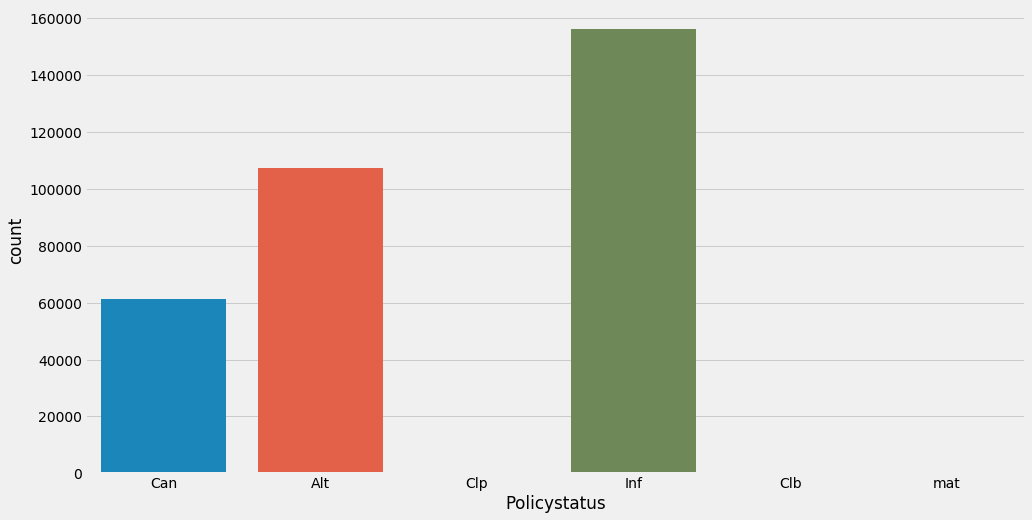

In [332]:
# Value count of Target (To be Preicted )
sns.countplot(df[target])
plt.show()

In [333]:
df[target] = df[target].astype(str)

In [334]:
# label encoder on taget in order so that model understand that
le = LabelEncoder()
le=le.fit(df[target])

In [335]:
le.classes_

array(['Alt', 'Can', 'Clb', 'Clp', 'Inf', 'mat'], dtype=object)

In [336]:
df[target]=le.transform(df[target])

In [337]:
dic={0: "Alt",1: "Can",2:"Clb",3:"Clp",4:"Inf",5:"mat"}

In [339]:
# Working with date time 
import datetime
df['Year_Birth'] = pd.DatetimeIndex(df['DOB']).year
df['Month_Birth'] = pd.DatetimeIndex(df['DOB']).month
df['Day_Birth'] = pd.DatetimeIndex(df['DOB']).day

In [340]:
import datetime
df['Year_Policy'] = pd.DatetimeIndex(df['DOC']).year
df['Month_Policy'] = pd.DatetimeIndex(df['DOC']).month
df['Day_Policy'] = pd.DatetimeIndex(df['DOC']).day

In [341]:
df['diff_days'] = df['Calc To']- df['Calc From']  
df['diff_days']=df['diff_days']/np.timedelta64(1,'D')

In [342]:
df.drop(["Calc To",'Calc From',"DOC","DOB","Policy Start Date"],inplace=True,axis=1)

In [343]:
df.head()

,Manual Code,Actual Cession No,Reinsurer Name,Member Name,Gender,Benefit Group ID,Plan Code,Benefit Sum Assured,Medical,EMR,Policystatus,Rein Ratio,Sum Retention,Account Code,Trans Type,Process Interval,SAR,RSA,Premium Rate,Sub Premium Rate,Amount,Age at Entry,Transaction SA,T Retention,FCL,Month,Year_Birth,Month_Birth,Day_Birth,Year_Policy,Month_Policy,Day_Policy,diff_days
0,4,5714516.0,0,1,0,4,8,2812212.0,0,0,1,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,0.22,0.22,-44.06,28,2812212,2000000,35000000,201905.0,1989,12,3,2018,7,1,89.0
1,4,5714516.0,0,1,0,4,8,2812212.0,0,0,1,0.288816,2000000.0,1,1,201905.0,3923982.0,1923982,0.22,0.22,-104.37,28,3923982,2000000,35000000,201905.0,1989,12,3,2018,7,1,89.0
2,4,5714516.0,0,1,0,4,8,2812212.0,0,0,1,0.288816,2000000.0,1,1,201905.0,2812212.0,812212,0.22,0.22,44.06,28,2812212,2000000,35000000,201905.0,1989,12,3,2018,7,1,89.0
3,4,5714545.0,0,1,1,4,8,2537217.0,0,0,1,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,0.34,0.34,-48.04,36,2537217,2000000,35000000,201905.0,1982,6,28,2018,7,1,95.0
4,4,5714545.0,0,1,1,4,8,2537217.0,0,0,1,0.211735,2000000.0,1,1,201905.0,2537217.0,537217,0.34,0.34,48.04,36,2537217,2000000,35000000,201905.0,1982,6,28,2018,7,1,95.0


In [344]:
feat= df.columns.tolist()
feat.remove(target)
print("Feature Length : {}".format(len(feat)))

Feature Length : 32


In [345]:
# Dividing data in X and Y 
X,y=df.drop(target,axis=1),df[target]

In [346]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325247 entries, 0 to 325246
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Manual Code          325247 non-null  int64  
 1   Actual Cession No    325247 non-null  float64
 2   Reinsurer Name       325247 non-null  int64  
 3   Member Name          325247 non-null  int64  
 4   Gender               325247 non-null  int64  
 5   Benefit Group ID     325247 non-null  int64  
 6   Plan Code            325247 non-null  int64  
 7   Benefit Sum Assured  325247 non-null  float64
 8   Medical              325247 non-null  int64  
 9   EMR                  325247 non-null  int64  
 10  Rein Ratio           325247 non-null  float64
 11  Sum Retention        325247 non-null  float64
 12  Account Code         325247 non-null  int64  
 13  Trans Type           325247 non-null  int64  
 14  Process Interval     325247 non-null  float64
 15  SAR              

In [347]:
# Divinding data in train data and test data  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state = 1994)

In [350]:
# model building and fitting on data 
model=lgb.LGBMClassifier()
model.fit(X_train,y_train)

predict = model.predict(X_val)
print(model)
#print('Predicted Values on Test Data',encode.inverse_transform(predict))

#print('\n\nAccuracy Score on test data : \n\n')
print(accuracy_score(y_val,predict))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
0.9476607737637714


In [352]:
submit = pd.DataFrame({'PolicyStatus': predict})

In [354]:
submit['PolicyStatus'] = submit['PolicyStatus'].map(dic)

In [355]:
submit.head()

,PolicyStatus
0,Inf
1,Alt
2,Alt
3,Inf
4,Alt


In [357]:
submit['PolicyStatus'].value_counts()

Inf    47556
Alt    33098
Can    16821
Clp       91
Clb        9
Name: PolicyStatus, dtype: int64